<a href="https://colab.research.google.com/github/Felipe-Fortes/Snake/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
# Criar uma classe Model que herda nn.Module
class Model(nn.Module):
  def __init__(self, in_features=4, h1=6, h2=6, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [22]:
# Seed manual pra aleatoriedade(tipo as seeds do minecraft :P)
torch.manual_seed(32)
model = Model()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)

In [25]:
species_mapping = {
    "setosa": 0.0,
    "versicolor": 1.0,
    "virginica": 2.0
}
my_df["species"] = my_df["species"].map(species_mapping)

In [26]:
X = my_df.drop("species", axis =1)
y = my_df["species"]

In [27]:
X = X.values
y = y.values

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [30]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [31]:
criterions = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [32]:
epoch = 200
losses = []
for i in range(epoch):
  y_pred = model.forward(X_train)
  loss = criterions(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.2169175148010254
Epoch: 10 and loss: 1.0072544813156128
Epoch: 20 and loss: 0.8318492770195007
Epoch: 30 and loss: 0.6045124530792236
Epoch: 40 and loss: 0.42110157012939453
Epoch: 50 and loss: 0.3010869026184082
Epoch: 60 and loss: 0.1983303278684616
Epoch: 70 and loss: 0.13285920023918152
Epoch: 80 and loss: 0.10034262388944626
Epoch: 90 and loss: 0.08400232344865799
Epoch: 100 and loss: 0.0749756470322609
Epoch: 110 and loss: 0.0694633275270462
Epoch: 120 and loss: 0.06577224284410477
Epoch: 130 and loss: 0.0631270706653595
Epoch: 140 and loss: 0.06114351004362106
Epoch: 150 and loss: 0.05960295721888542
Epoch: 160 and loss: 0.05837203934788704
Epoch: 170 and loss: 0.05736034736037254
Epoch: 180 and loss: 0.056504715234041214
Epoch: 190 and loss: 0.05576140806078911


Text(0.5, 0, 'Epoch')

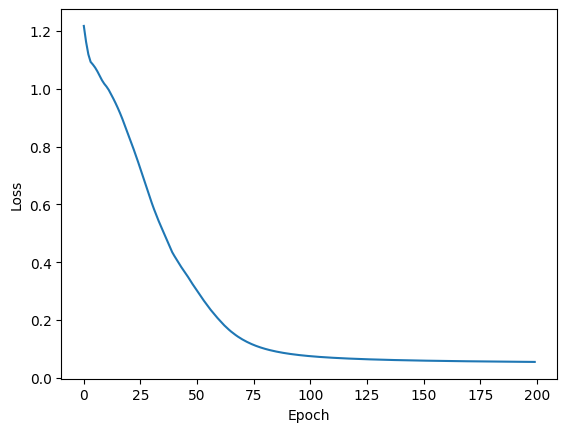

In [33]:
plt.plot(range(epoch), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [34]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterions(y_eval, y_test)

In [35]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f"{i+1}.) {str(y_val)} \t {y_test[i]}")

    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"{correct} Flores Corretas")


1.) tensor([-7.6856,  1.4467, -3.4004]) 	 1
2.) tensor([  7.7676,   0.7919, -20.7353]) 	 0
3.) tensor([  6.9502,   0.8636, -19.9267]) 	 0
4.) tensor([-8.4143,  1.5521, -3.6653]) 	 1
5.) tensor([-11.5253,  -0.6252,   2.7815]) 	 2
6.) tensor([-13.6758,  -0.2034,   1.8798]) 	 2
7.) tensor([  6.0007,   0.9379, -18.9015]) 	 0
8.) tensor([  7.6863,   0.7847, -20.5168]) 	 0
9.) tensor([-7.7302,  1.7474, -4.3096]) 	 1
10.) tensor([  7.8446,   0.8347, -21.2852]) 	 0
11.) tensor([-8.6825,  1.7182, -3.9814]) 	 1
12.) tensor([-12.9456,  -1.6070,   5.0875]) 	 2
13.) tensor([-5.0259,  1.6273, -5.3359]) 	 1
14.) tensor([-5.2741,  1.8328, -6.8484]) 	 1
15.) tensor([-11.8400,  -0.7445,   2.7696]) 	 2
16.) tensor([-12.2851,  -1.9416,   5.9360]) 	 2
17.) tensor([-8.1229,  1.0523, -2.3843]) 	 1
18.) tensor([-10.7634,  -0.2860,   1.4289]) 	 2
19.) tensor([-5.5447,  1.7983, -6.0235]) 	 1
20.) tensor([  8.4457,   0.8534, -22.5635]) 	 0
21.) tensor([  6.8002,   0.9235, -20.2252]) 	 0
22.) tensor([-14.2905,  -

In [36]:
nova_flor = torch.tensor([5.1, 3.5, 1.4, 0.2])

In [37]:
with torch.no_grad():
  print(model.forward(nova_flor))
  print(model.forward(nova_flor).argmax().item())

tensor([  8.0654,   0.8189, -21.5381])
0
